# Titulo: Análisis de Transacciones con Tarjetas de Crédito para la Detección de Fraudes y el Análisis Financiero

- **Fuente de datos**: [Credit Card Transactions Dataset](https://www.kaggle.com/datasets/priyamchoksi/credit-card-transactions-dataset?resource=download)
- **Intro**: El presente trabajo se enfoca en el análisis de un extenso dataset que registra transacciones con tarjetas de crédito, el cual incluye más de 1.85 millones de registros detallados. Estos datos comprenden información crucial sobre los tiempos de transacción, los montos involucrados y detalles asociados tanto a los usuarios como a los comercios. Este dataset ofrece una rica fuente de información para explorar diversos aspectos del comportamiento financiero, lo que permite no solo identificar patrones y tendencias, sino también contribuir al desarrollo de sistemas más efectivos de detección de fraudes y análisis financiero.
- **Objetivo**: El objetivo principal de este trabajo es explorar y analizar el dataset de transacciones con tarjetas de crédito para identificar patrones de comportamiento financiero y desarrollar modelos que permitan la detección temprana de fraudes. A través de técnicas de aprendizaje automático y análisis estadístico, se busca segmentar clientes, clasificar transacciones, realizar análisis geoespaciales, y construir modelos predictivos que puedan anticipar comportamientos de gasto futuros y detectar posibles actividades fraudulentas.

# 0. Librerias

In [2]:
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")
path= os.getcwd()
print(os.listdir())
file_name=[x for x in os.listdir() if 'credit_card_transactions.csv' in x][0]
file_name

['Actividad_1.ipynb', 'Bootcamp-DS-2024-I-main.zip', 'Credit Card Transactions Data set.zip', 'credit_card_transactions.csv']


'credit_card_transactions.csv'

# 1. Data Extraction

In [9]:
df=pd.read_csv(path+ '\\'+file_name, sep=",", encoding='utf-8')
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0


In [10]:
print(df.shape)
df.columns

(1296675, 24)


Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')

In [19]:
print(df["city"]. value_counts().head(10))

city
Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
Thomas         4634
Conway         4613
Cleveland      4604
Warren         4599
Houston        4168
Name: count, dtype: int64


In [27]:
import pandas as pd
import matplotlib.pyplot as plt

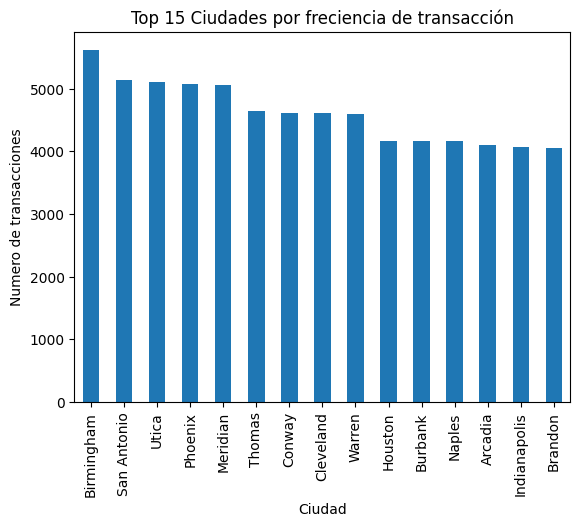

In [30]:
df["city"].value_counts().head(15).plot(kind='bar')
plt.title('Top 15 Ciudades por freciencia de transacción')
plt.xlabel('Ciudad')
plt.ylabel('Numero de transacciones')
plt.show()
# En esta parte reviso cuantas veces aparece cada ciudad y selecciono las 15 con una mayor frecuencia (df["city"].value_counts().head(15).plot(kind='bar'))
    #con la funcion .plot(kind='bar' genero un gráfico de barras
    #plt.title('Top 15 Cities by Transaction Frequency') \ plt.xlabel('City') \ plt.ylabel('Number of Transactions') doy titulos a las variables en X y en Y
    # con plt.show() genero el gráfico.

# 2. Columnas de interes

Para la detección de fraude y permitir el análisis financiero, se determina que las columnas de interés son las que permiten la identificación de patrones que pueden ser útiles para desarrollar modelos predictivos y detectar anomalías en las transacciones.
Según el data set, se categorizan en columnas de interés principal y de interés secundario, de la siguiente manera: 
Columnas de Interés Principales:

    'trans_date_trans_time'
        Fecha y hora de la transacción: Esta columna es crucial para analizar patrones temporales en las transacciones, como detectar comportamientos inusuales en horas específicas o períodos de tiempo cortos que podrían indicar actividad fraudulenta.
    'merchant'
        Comercio: dentificar el comercio donde se realizó la transacción es clave para detectar patrones de gasto en establecimientos específicos, lo cual es útil tanto para segmentación de clientes como para detección de fraudes.
    'category'
        Categoria del comercio: Ayuda a clasificar las transacciones en diferentes tipos de gastos (como alimentación, entretenimiento, etc.), lo cual es útil para entender los comportamientos de gasto y para la segmentación de clientes.
    'amt'
        Monto de la transacción: El monto de la transacción es un factor crucial tanto en el análisis financiero como en la detección de fraudes, ya que montos inusualmente altos o patrones específicos en los montos pueden indicar actividad fraudulenta.
    'lat, long'
        Latitud y longitud del cliente: Estos datos son esenciales para el análisis geoespacial y la detección de fraudes, especialmente cuando se compara con las coordenadas del comercio (merch_lat, merch_long).
    'merch_lat, merch_long'
        Latitud y longitud del comercio: Importante para el análisis geoespacial y la detección de fraudes, especialmente cuando se compara con las coordenadas del cliente (lat, long).
    'is_fraud'
        Indicación de fraude: Esta es una de las columnas más importantes, ya que indica si la transacción ha sido identificada como fraudulenta, lo cual es fundamental para entrenar y evaluar modelos de detección de fraudes.

Columnas de interés secundarias:

    'cc_num'
        Número de tarjeta de crédito.
    'gender'
        Género.
    'street, city, state, zip'
        Dirección y código postal.
    'city_pop'
        Población de la ciudad
    'job'
        Trabajo.
    'dob'
        Fecha de nacimiento
    'unix_time'
        Tiempo en formato unix
    'merch_zipcode'
        Código postal del comercio.

# Actividad 2

# 1. Librerias

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
path= os.getcwd()
print(os.listdir())
file_name=[x for x in os.listdir() if 'credit_card_transactions.csv' in x][0]
file_name

['Actividad_1.ipynb', 'Actividad_2.ipynb', 'Bootcamp-DS-2024-I-main.zip', 'Credit Card Transactions Data set.zip', 'credit_card_transactions.csv']


'credit_card_transactions.csv'

# 2. Cargue de data

In [6]:
df=pd.read_csv(path+ '\\'+file_name, sep=",", encoding='utf-8')
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0


In [7]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')

In [8]:
df.isnull().sum()

Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

# 3. EDA = Exploración y Data Análisis

# Gráfico 1: Distribución de Montos de Transacciones (Histogram) con matplotlib

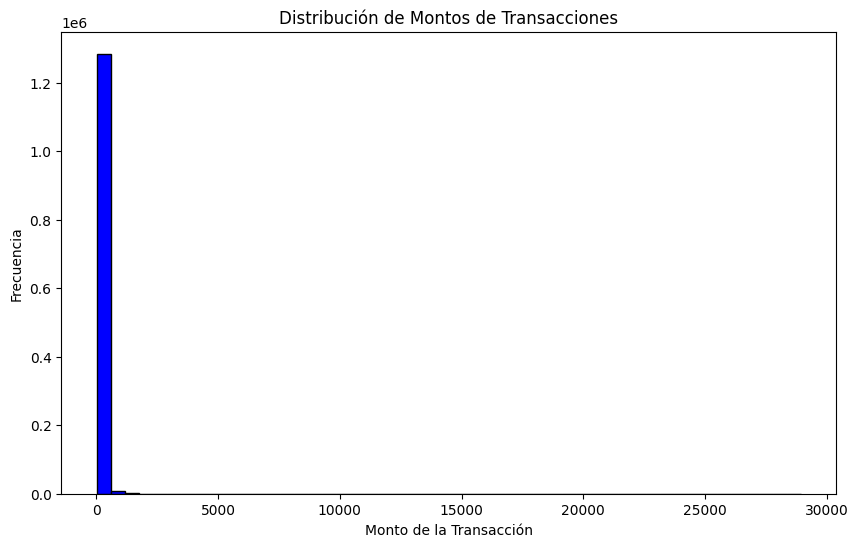

In [13]:
import matplotlib.pyplot as plt

# Crear un histograma de los montos de transacciones
plt.figure(figsize=(10,6))
plt.hist(df['amt'], bins=50, color='blue', edgecolor='black')
plt.title('Distribución de Montos de Transacciones')
plt.xlabel('Monto de la Transacción')
plt.ylabel('Frecuencia')
plt.show()


La gráfica generada pretende mostrar los montos de las transacciones, pero debido a que tiene una mayoría de datos concentrados en montons bajos, el histograma no permite la visualizacion de la distribucion completa, esto deido a que hay transaciones de montos elevados que son datos atipicos.
Debido a estos datos atipicos, se generan problemas con la gráfica ya que representa un sesgo de los datos, debido a que existe una asimetria hacia el lado izquierdo de la gráfica.
Además de esto se evidencia que el rango de valores del eje X es amplio (0 a 30,000), pero la mayoría de los datos están concentrados en los montos más bajos.

Despues de una exploración de opciones para lograr visualizar los datos de una mejor manera se exploro con la función Boxplot

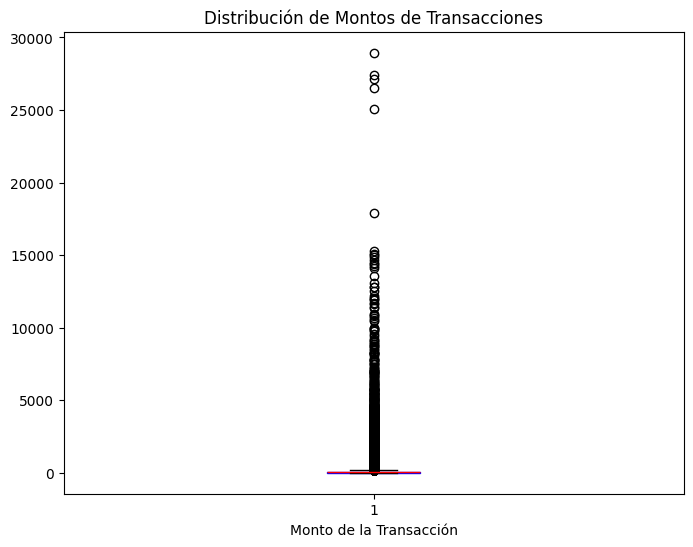

In [20]:
import matplotlib.pyplot as plt

# Crear un boxplot de los montos de transacciones
plt.figure(figsize=(8,6))
plt.boxplot(df['amt'], patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'), 
            medianprops=dict(color='red'))
plt.title('Distribución de Montos de Transacciones')
plt.xlabel('Monto de la Transacción')
plt.show()

Mediante la utilización de este tipo de gráfico se logra visualizar de una mejor manera y permite una mejor interpretación de los resultados.
Como conclusiones, se puede distinguir que la mayoría de los montos de las transacciones están concentrados en la parte baja del rango, lo que indica que la mayoría de las transacciones son de valores bajos.
Este gráfico en comparación al anterior permitio observar que existen unos datos atipicos significativos y estos podrian ser un indicativo de transaciones anormales o incluso fraudulentas, este tipo de transacciones podrian ser relevantes en la detección de fraudes.
Adicionalmente se puede identificar que la mediana es baja en comparación con los valores mas elevados, esto confirma que la mayoría de las transacciones son de montos pequeños.

# Gráfico 2: Conteo de Transacciones por Categoría (Count Plot) con seaborn

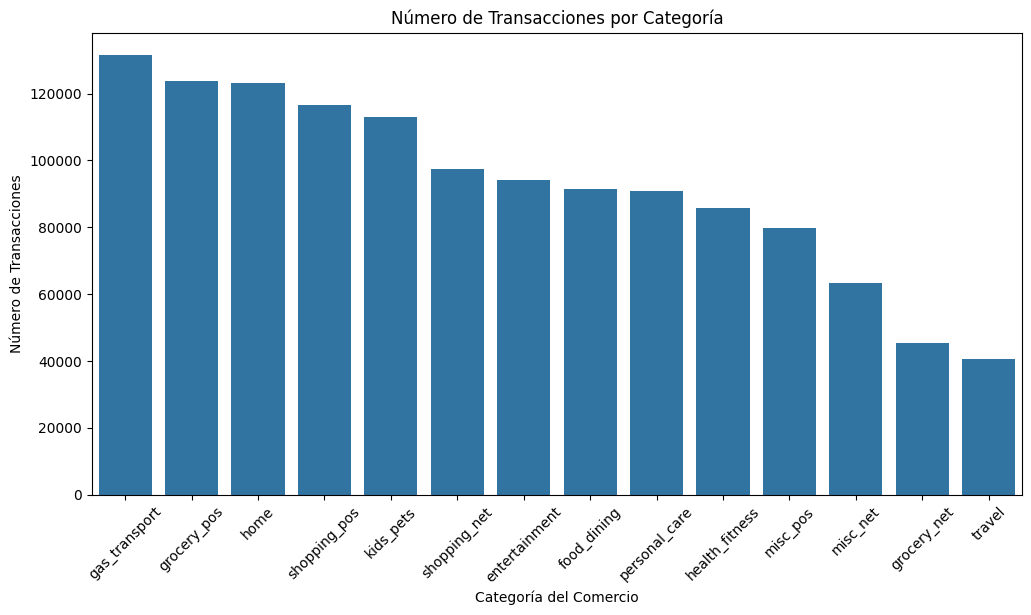

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un count plot para las categorías de transacciones
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.title('Número de Transacciones por Categoría')
plt.xlabel('Categoría del Comercio')
plt.ylabel('Número de Transacciones')
plt.xticks(rotation=45)
plt.show()


El análisis del gráfico de conteo de transacciones por categoría revela patrones significativos en que podrian ayudar a la detección de fraudes. La categoría 'Gas Transport' presenta el mayor número de transacciones, lo que podría indicar un gasto basico. Sin embargo, un alto volumen de transacciones en una categoría específica puede también ser un indicativo de comportamientos fraudulentos si no se corresponde con el perfil típico del usuario.
Segun lo anterior, las categorías con menos transacciones, como 'Travel', podrían ser menos propensas al fraude debido a su menor frecuencia. No obstante, la presencia de datos atípicos en cualquier categoría merece una atención, ya que podrían señalar transacciones anormales o fraudulentas. Analizar estas variaciones y la distribución de las transacciones ayuda a identificar patrones sospechosos y a implementar medidas de prevención más efectivas.